In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spectral_embedding as se

In [2]:
np.random.seed(42)

Generate a weighted stochastic block model with two equally likely communities where matrix entries are Gaussian random variables with block mean and variance matrices
$$
    \mathbf{B} = \left( \begin{array}{cc}
        1 & 1 \\
        1 & 1
    \end{array} \right), \quad
    \mathbf{C} = \left( \begin{array}{cc}
        2 & 1 \\
        1 & 1
    \end{array} \right).
$$

In [3]:
K = 2     # Number of communities
n = 1000  # Number of nodes

In [4]:
pi = np.repeat(1/K, K)

B = np.array([[1, 1],
              [1, 1]])
C = np.array([[2, 1],
              [1, 1]])

In [5]:
A, Z = se.generate_WSBM(n, pi, [B, C], 'gaussian')

Colour the nodes based on the community labels.

In [6]:
colours = np.array(['tab:blue', 'tab:red'])
Z_colours = colours[Z]

As the block mean matrix $\mathbf{B}$ has rank one, embed the network into $d = 1$ dimensions.

In [7]:
XA = se.ASE(A, 1)

Create a violin plot to show the distribution of the embedding in the two communities. The means of the distributions are identical as the rows of the block mean matrix are the same resulting in $\phi(1) = \phi(2)$. However, the variances are different for the two communities.

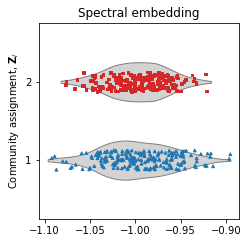

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(3.6,3.6))

idx_0 = np.where(Z == 0)[0]
idx_1 = np.where(Z == 1)[0]

# Create violin plots
parts = ax.violinplot([XA[idx_0,0], XA[idx_1,0]], showextrema=False, vert=False)

for pc in parts['bodies']:
    pc.set_facecolor('lightgrey')
    pc.set_edgecolor('grey')
    pc.set_alpha(1)

# Create jitter plot for a sample set of points  
n_sample = 200
sample_0 = np.random.choice(np.where(Z == 0)[0], n_sample, replace=False)
sample_1 = np.random.choice(np.where(Z == 1)[0], n_sample, replace=False)

jitter_0 = 0.25*(np.random.random(n_sample)-0.5)
jitter_1 = 0.25*(np.random.random(n_sample)-0.5)
    
ax.scatter(XA[sample_0,0], 1 + jitter_0, marker='^', s=8, c=Z_colours[sample_0])
ax.scatter(XA[sample_1,0], 2 + jitter_1, marker='s', s=7, c=Z_colours[sample_1])   
    
ax.set_yticks([1, 2])
ax.set_ylim(0.25, 2.75)
ax.set_ylabel(r'Community assignment, $\mathbf{Z}_i$')
ax.set_title('Spectral embedding');

Compute the variances of the embedding for the two communities and show that this is equal to the predicted variance terms.

In [9]:
print('Community 1 variance:', np.round(np.var(XA[Z == 0,0]), 4))
print('Community 2 variance:', np.round(np.var(XA[Z == 1,0]), 4))

Community 1 variance: 0.0015
Community 2 variance: 0.001


In [10]:
X, SigmaX = se.WSBM_distbn(A, B, C, Z, pi, 1)
print('Community 1 variance:', np.round(SigmaX[0,0,0]/n, 4))
print('Community 2 variance:', np.round(SigmaX[1,0,0]/n, 4))

Community 1 variance: 0.0015
Community 2 variance: 0.001
